In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df= pd.read_csv('sample_data.csv',index_col=0)

In [17]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,NaN
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,NaN,Masters


In [18]:
df.shape

(9, 3)

In [19]:
df.isnull().sum()

Title            0
Salary           1
Qualification    1
dtype: int64

## Replace missing values

In [20]:
df['Salary']= df['Salary'].fillna(df['Salary'].median())

In [21]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,NaN
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,18500.0,Masters


In [22]:
df['Salary'].median()

18500.0

In [23]:
df['Qualification'].mode()

0    Bachelors
1      Masters
Name: Qualification, dtype: object

In [24]:
df['Qualification']= df['Qualification'].fillna(df['Qualification'].mode()[1])

In [25]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,Masters
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,18500.0,Masters


In [12]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,Masters
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,18500.0,Masters


## Remove Duplicates

In [28]:
df1= pd.read_csv('Sample_data1.csv',index_col=0)

In [29]:
df1

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
4,Professor,25000.0,Bachelors
7,Business Analyst,18000.0,NaN
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,NaN,Masters


In [30]:
df1.duplicated()

Serial Number
1    False
2    False
3    False
4    False
5    False
4     True
7    False
8    False
9    False
dtype: bool

In [32]:
df1.drop_duplicates(inplace=True)

In [33]:
df1

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
7,Business Analyst,18000.0,NaN
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,NaN,Masters


## Remove Outliers

In [34]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,Masters
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,18500.0,Masters


In [35]:
df['Salary']

Serial Number
1    20000.0
2    23000.0
3    18000.0
4    25000.0
5    17000.0
6    19000.0
7    18000.0
8       23.0
9    18500.0
Name: Salary, dtype: float64

<Axes: >

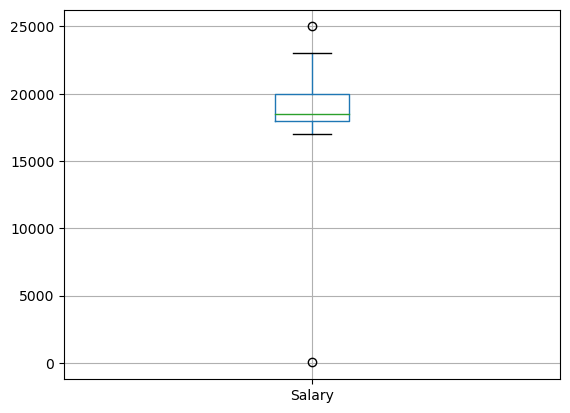

In [39]:
df.boxplot('Salary')

In [61]:
Q3= df['Salary'].quantile(0.75)
Q3

20000.0

In [62]:
Q1= df['Salary'].quantile(0.25)
Q1

18000.0

In [63]:
IQR= Q3-Q1
IQR

2000.0

In [64]:
Lower_Extreme= Q1-1.5*IQR
Lower_Extreme

15000.0

In [65]:
Upper_Extreme= Q3+1.5*IQR
Upper_Extreme

23000.0

In [66]:
df_outliers= df[(df['Salary']<Lower_Extreme) | (df['Salary']>Upper_Extreme)]

In [67]:
df_outliers

,Title,Salary,Qualification
Serial Number,,,
4,Professor,25000.0,Bachelors
8,UX/UI Developer,23.0,Bachelors


In [68]:
df_no_outliers= df[(df['Salary']>Lower_Extreme) & (df['Salary']<Upper_Extreme)]

In [69]:
df_no_outliers

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
3,Project Manager,18000.0,Masters
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,Masters
9,Devops Engineer,18500.0,Masters


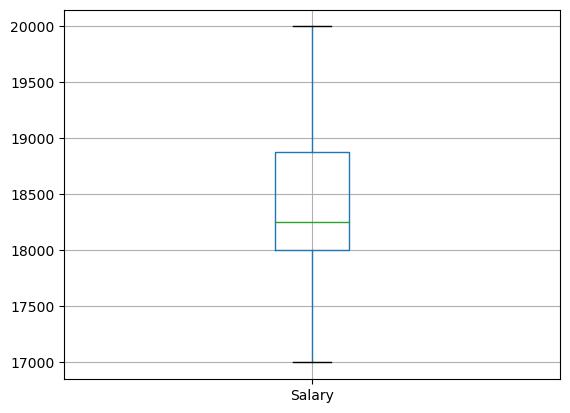

In [70]:
df_no_outliers.boxplot('Salary')
plt.show()

## Correlation between the features

In [71]:
df

,Title,Salary,Qualification
Serial Number,,,
1,Software Engineer,20000.0,Bachelors
2,Data Scientist,23000.0,Masters
3,Project Manager,18000.0,Masters
4,Professor,25000.0,Bachelors
5,Database Architect,17000.0,Bachelors
6,Machine Learning Engineer,19000.0,Masters
7,Business Analyst,18000.0,Masters
8,UX/UI Developer,23.0,Bachelors
9,Devops Engineer,18500.0,Masters


In [72]:
df['Previous_Salary']= [19650, 18999,17000,24000,18000,18500,17000,10.5,17900]

In [73]:
df

,Title,Salary,Qualification,Previous_Salary
Serial Number,,,,
1,Software Engineer,20000.0,Bachelors,19650.0
2,Data Scientist,23000.0,Masters,18999.0
3,Project Manager,18000.0,Masters,17000.0
4,Professor,25000.0,Bachelors,24000.0
5,Database Architect,17000.0,Bachelors,18000.0
6,Machine Learning Engineer,19000.0,Masters,18500.0
7,Business Analyst,18000.0,Masters,17000.0
8,UX/UI Developer,23.0,Bachelors,10.5
9,Devops Engineer,18500.0,Masters,17900.0


In [74]:
df.corr()

C:\Users\excel\AppData\Local\Temp\ipykernel_28264\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Salary,Previous_Salary
Salary,1.000000,0.982853
Previous_Salary,0.982853,1.000000


In [75]:
import seaborn as sns

C:\Users\excel\AppData\Local\Temp\ipykernel_28264\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


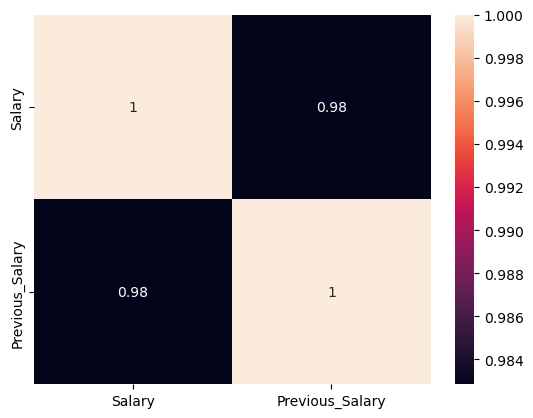

In [78]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Machine Learning flow

In [79]:
data= pd.read_csv('sl1.csv')

In [80]:
data

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [81]:
features= data.drop('Price',axis=1)

In [82]:
features

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [83]:
target= data['Price']

In [84]:
target

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.7,random_state=10)

In [88]:
x_train

,Area
0,2600
4,4000
1,3000


In [89]:
x_test

,Area
2,3200
3,3600


In [90]:
y_train

0    550000
4    725000
1    565000
Name: Price, dtype: int64

In [91]:
y_test

2    610000
3    680000
Name: Price, dtype: int64